In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

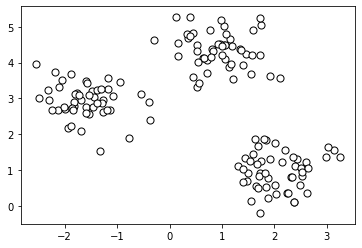

In [3]:
# create dataset
X, y = make_blobs(
   n_samples=150, n_features=2,
   centers=3, cluster_std=0.5,
   shuffle=True, random_state=0
)

# plot
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

In [4]:
print(X)

[[ 2.60509732  1.22529553]
 [ 0.5323772   3.31338909]
 [ 0.802314    4.38196181]
 [ 0.5285368   4.49723858]
 [ 2.61858548  0.35769791]
 [ 1.59141542  4.90497725]
 [ 1.74265969  5.03846671]
 [ 2.37533328  0.08918564]
 [-2.12133364  2.66447408]
 [ 1.72039618  5.25173192]
 [ 3.1368855   1.56592763]
 [-0.37494566  2.38787435]
 [-1.84562253  2.71924635]
 [ 0.72144399  4.08475018]
 [ 0.16117091  4.53517846]
 [-1.99912714  2.71285741]
 [-1.47804153  3.2093591 ]
 [ 1.8706766   0.77797407]
 [-1.5933443   2.76898682]
 [ 2.03562611  0.31361691]
 [ 0.64003985  4.12401075]
 [ 2.4411628   1.30941574]
 [ 1.13280393  3.87673946]
 [ 1.04829186  5.03092408]
 [-1.26637157  2.62998828]
 [ 2.31690585  0.81189049]
 [ 2.36230721  1.358767  ]
 [ 1.2091013   3.53566548]
 [-2.54224625  3.95012869]
 [ 1.4815332   0.67875364]
 [-1.59487886  3.48632794]
 [-1.82556205  2.7989214 ]
 [-1.13374003  2.68467271]
 [-1.758702    3.158623  ]
 [ 0.3498724   4.69253251]
 [ 1.68548602  1.66917096]
 [ 2.989047    1.35068599]
 

In [5]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

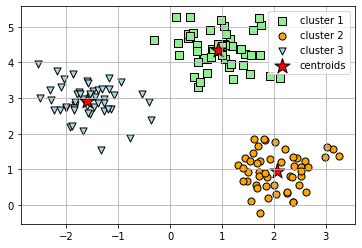

In [6]:
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [7]:
km.labels_

array([1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 1,
       0, 0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 1,
       1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2,
       2, 1, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0,
       2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1], dtype=int32)

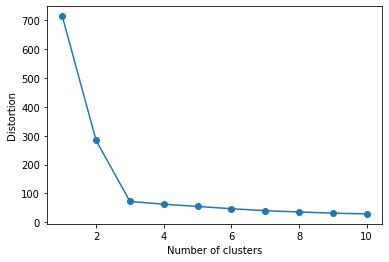

In [7]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()